In [2]:
from sympy import Matrix, S, linsolve, symbols, simplify
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [3]:
x, y, z, w = symbols("x, y, z, w")
cp, cm, cp0, cm0 = symbols("c_+, c_-, c_+^0, c_-^0")
kp, km = symbols("k_+, k_-")
vp, vm = symbols("v_+, v_-")
A = Matrix([[1, cp, cp * cp, cp **3], [1, cm, cm**2, cm**3],[0, 1, 2 * cp, 3 * cp **2], [0, 1, 2 * cm, 3 * cm**2]])
b = Matrix([vp + kp * cp0 - kp * cp, -vm + km * cm0 - km * cm, -kp, -km])

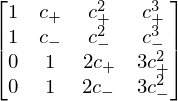

In [4]:
A

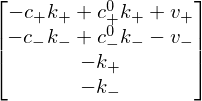

In [5]:
b

In [6]:
X = linsolve((A, b), x, y, z, w)

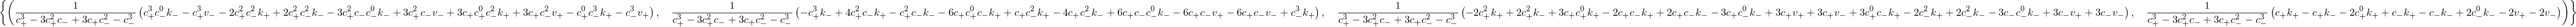

In [7]:
X

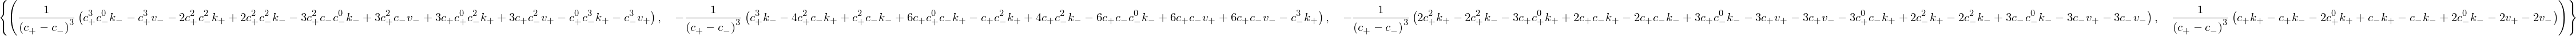

In [8]:
from sympy.simplify import combsimp
combsimp(X)

In [9]:
b0, b1, b2, b3 = symbols("b_0, b_1, b_2, b_3")
B = Matrix([b0, b1, b2, b3])

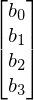

In [10]:
B

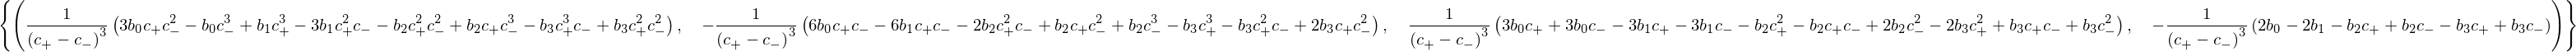

In [11]:
combsimp(linsolve((A, B), x, y, z, w))

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
c0_p = 0.
c0_m = 1.
k_p = k_m = 0.01
nu_0 = 0.01
cc_p = c0_p + 0.25
cc_m = c0_p + 0.75
eps = 0.2
turnover = 1.2
nu_p = eps * k_p
nu_m = turnover * nu_0
b0 = nu_p + k_p * (c0_p - cc_p)
b1 = -nu_m + k_m * (c0_m - cc_m)
b2 = -k_p
b3 = -k_m
tmp = 1 / (cc_p - cc_m) ** 3
p0 = b0* cc_m * cc_m * (3 * cc_p - cc_m) + b1 * cc_p * cc_p * (cc_p - 3 * cc_m) + (b2 * cc_m + b3 * cc_p) * cc_p * cc_m * (cc_m - cc_p)
p1 = 6 * (b0 - b1) * cc_p * cc_m - b2 * cc_m * (2 * cc_p + cc_m) * (cc_p - cc_m) - b3 * cc_p * (cc_p - cc_m) * (cc_p + 2 * cc_m)
p2 = 3 * (b0 - b1) * (cc_p + cc_m) - b2 * (cc_p + 2 * cc_m) * (cc_p - cc_m) - b3 * (2 * cc_p + cc_m) * (cc_p - cc_m)
p3 = 2 * (b0 - b1) - (b2 + b3) * (cc_p - cc_m)
p0 *= tmp
p1 *= -tmp
p2 *= tmp
p3 *= -tmp

In [20]:
def f_s(x):
    if (x < cc_p):
        s = nu_p + k_p * (c0_p - x)
    elif (x > cc_m):
        s = -nu_m + k_m * (c0_m - x)
    else:
        s = p0 + p1 * x + p2 * x * x + p3 * x * x * x
    return s

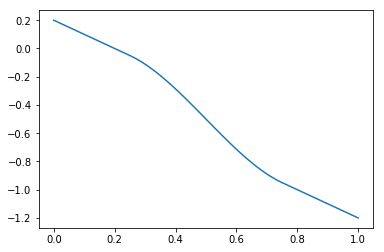

In [21]:
c = np.linspace(0, 1, 100)
s = np.array([f_s(i) for i in c])
plt.plot(c , s/nu_0)
plt.show()